In [7]:
#### LOAD DATASET ####

import cv2
from pathlib import Path
import numpy as np


IMAGES_PATH = 'C:/Users/tmarc\OneDrive - Aarhus universitet/Documents/Aarhus University/1st semester/Deep Learning for VisRec/Deep-Learning-Project-Data/website-screenshots-1440x900/music'


def read_images(path):
    files = [x for x in path.iterdir() if x.is_file()][:1000]

    l = []
    for path in files:
        img = cv2.resize(cv2.cvtColor(cv2.imread(str(path)), cv2.COLOR_BGR2RGB), (720, 450))
        l.append(img)
    l = np.array(l)
    return l


def train_test_split(data):
    np.random.shuffle(data)
    train_size = int(len(data) * .9)
    return data[:train_size], data[train_size:]


images = read_images(Path(IMAGES_PATH)) / 255.
x_train, x_test = train_test_split(images)

print(images.shape)


(1000, 450, 720, 3)


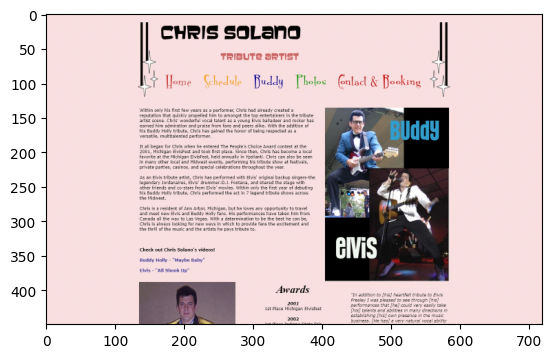

In [12]:
from matplotlib import pyplot as plt

plt.imshow(images[0])

In [24]:
#### TRAIN AUTOENCODER ####

from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, AveragePooling2D, BatchNormalization, ZeroPadding2D
from keras import Sequential
import keras


def show_imgs(x_test, n=10):
    sz = x_test.shape[1]
    plt.figure(figsize=(100, 50))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(x_test[i].reshape(sz, sz, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


autoencoder = Sequential([
    Conv2D(input_shape=(450, 720, 3), filters=16, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(filters=48, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(name='compressed', pool_size=(2, 2)),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    ZeroPadding2D(((1, 0), (0, 0))),
    Conv2D(filters=48, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D((3, 3)),
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(filters=3, kernel_size=(5, 5), padding='same', activation='sigmoid'),
])

print(autoencoder.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 450, 720, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 225, 360, 16)     0         
 2D)                                                             
                                                                 
 conv2d_29 (Conv2D)          (None, 225, 360, 48)      6960      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 120, 48)      0         
 2D)                                                             
                                                                 
 conv2d_30 (Conv2D)          (None, 75, 120, 128)      55424     
                                                                 
 compressed (MaxPooling2D)   (None, 37, 60, 128)      

In [25]:
# autoencoder.compile(optimizer=keras.optimizers.SGD(learning_rate=3, momentum=0.9), loss='mse')
autoencoder.compile(optimizer=keras.optimizers.RMSprop(), loss='mse')
# autoencoder.compile(optimizer=keras.optimizers.Adam(), loss='mse')

In [ ]:
autoencoder.fit(x_train, x_train, epochs=1, batch_size=10,
                shuffle=True, validation_data=(x_test, x_test), verbose=1)
               #shuffle=True, validation_data=(x_test, x_test), verbose=1)

In [ ]:
decoded_imgs = autoencoder.predict(x_test[:10])
print("input (upper row)")
show_imgs(x_test)
print("decoded (bottom row)")
show_imgs(decoded_imgs)